In [1]:
import pandas as pd
import sklearn.metrics as sk
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support

In [4]:
# clustering per families
data_true

,id_transcript,group
0,ENST00000522677,1
1,ENSMUST00000088658,1
2,ENSCAFT00000043735,1
3,ENST00000524176,2
4,ENSMUST00000115468,2
...,...,...
1891,ENST00000338183,878
1892,ENST00000562877,878
1893,ENST00000567389,878
1894,ENST00000569302,879


In [3]:
tsm_Kalign_m

,id_transcript,group
0,ENST00000361272,1
1,ENSCAFT00000011068,1
2,ENST00000523917,2
3,ENSMUST00000132032,3
4,ENSMUST00000149992,3
...,...,...
1891,ENSCAFT00000023420,721
1892,ENST00000319770,722
1893,ENST00000355772,723
1894,ENSMUST00000112428,724


In [44]:
metricdata = tsm_corrigé_Macse_m
#result_df = pd.DataFrame(columns=['family','Homogeneity', 'Completeness', 'V-measure'])
result_df = pd.DataFrame(columns=['family','Homogeneity', 'Completeness', 'V-measure', 'nb_ref', 'nb_pred'])
for tree in trees:
    print(tree)
    nb_ref = 0
    nb_pred = 0
    path_tr = './../../results/{}/{}_gtot.csv'.format(tree,tree)
    file = pd.read_csv(path_tr, sep=';')
    transcripts = [str(_).split('_90')[0] for _ in list(file.id_transcript.values)]
    clustering_true = data_true[data_true.id_transcript.isin(transcripts)].sort_values(by=['id_transcript'])
    clustering_pred = metricdata[metricdata.id_transcript.isin(transcripts)].sort_values(by=['id_transcript'])
    transcripts_sorted = list(clustering_true.id_transcript.values)
    nb_ref = len(list(set(clustering_true.group.values)))
    nb_pred = len(list(set(clustering_pred.group.values)))
    #true_groups = list(set(list(clustering_true.group.values)))
    #pred_groups = list(clustering_pred.group.values)
    new_clusters_pred = pd.DataFrame(columns=['id_transcript','group'])
    new_clusters_true = pd.DataFrame(columns=['id_transcript','group'])
    already_done_pred = []
    already_done_true = []
    #true_clusters = [set(list(clustering_true[clustering_true['group']==_].id_transcript.values)) for _ in true_groups]
    #print(len(transcripts_sorted))
    for i,transcript in enumerate(transcripts_sorted):
        group_true = clustering_true[clustering_true['id_transcript']==transcript].group.values[0]
        trs_true_group = list(clustering_true[clustering_true['group']==group_true].id_transcript.values)
        for tr_true_group in trs_true_group:
            if (tr_true_group not in already_done_true):
                new_clusters_true.loc[tr_true_group]=[tr_true_group,i]
                already_done_true.append(tr_true_group)
        
        group_pred = clustering_pred[clustering_pred['id_transcript']==transcript].group.values[0]
        trs_pred_group = list(clustering_pred[clustering_pred['group']==group_pred].id_transcript.values)
        for tr_pred_group in trs_pred_group:
            if(tr_pred_group not in already_done_pred):
                new_clusters_pred.loc[tr_pred_group]=[tr_pred_group,i]
                already_done_pred.append(tr_pred_group)
    y = list(new_clusters_pred.sort_values(by=['id_transcript']).group.values)
    x = list(new_clusters_true.sort_values(by=['id_transcript']).group.values)
    #print(x)
    #print(y)
    mesures = precision_recall_fscore_support(x,y, average='macro')
    #print(mesures)
    result_df.loc[tree] = (tree, mesures[0], mesures[1], mesures[2], nb_ref, nb_pred)
result_df


ENSGT00390000000080
ENSGT00390000000104
ENSGT00390000000212
ENSGT00390000000583


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1

ENSGT00390000000860
ENSGT00390000001038
ENSGT00390000001586


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000002049
ENSGT00390000002215
ENSGT00390000002219
ENSGT00390000002869


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000003289
ENSGT00390000003751


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000004263
ENSGT00390000004420
ENSGT00390000004852
ENSGT00390000005436


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000005492
ENSGT00390000005639


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000005653
ENSGT00390000005720
ENSGT00390000006330
ENSGT00390000006718
ENSGT00390000006915
ENSGT00390000007225
ENSGT00390000007430


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000007688
ENSGT00390000007725
ENSGT00390000008738


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000008805
ENSGT00390000009187


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000009225
ENSGT00390000009535
ENSGT00390000009627
ENSGT00390000009964


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000010039
ENSGT00390000010072


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000010215
ENSGT00390000010431
ENSGT00390000010441


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000010858
ENSGT00390000011058
ENSGT00390000011576
ENSGT00390000012078
ENSGT00390000012082


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000012143
ENSGT00390000012186
ENSGT00390000012202


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1

ENSGT00390000012618
ENSGT00390000012886


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000012913
ENSGT00390000013112


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000013613
ENSGT00390000013955
ENSGT00390000013974
ENSGT00390000013989
ENSGT00390000014155


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000014393
ENSGT00390000014757
ENSGT00390000014924
ENSGT00390000015092


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000015107
ENSGT00390000015714
ENSGT00390000016016
ENSGT00390000016215
ENSGT00390000016223
ENSGT00390000016462


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000016577
ENSGT00390000016904
ENSGT00390000017241


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000017627
ENSGT00390000017850
ENSGT00390000018003
ENSGT00390000018031
ENSGT00390000018123


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00390000018199
ENSGT00390000018272
ENSGT00390000018330
ENSGT00390000018465
ENSGT00390000018885


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00410000025363
ENSGT00440000033687
ENSGT00440000035370


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00440000039936
ENSGT00440000040103
ENSGT00490000043415
ENSGT00500000044808
ENSGT00510000046403
ENSGT00510000046419

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1


ENSGT00510000046421
ENSGT00510000046606
ENSGT00510000046803


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00510000046974
ENSGT00510000047065
ENSGT00510000047522
ENSGT00510000048032
ENSGT00510000048934
ENSGT00520000055591
ENSGT00520000055597
ENSGT00530000062839
ENSGT00530000062888
ENSGT00530000062919
ENSGT00530000063062


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00530000063077
ENSGT00530000063087


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00530000063138
ENSGT00530000063156
ENSGT00530000063194
ENSGT00530000063197
ENSGT00530000063211


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00530000063219
ENSGT00530000063301
ENSGT00530000063319


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00530000063426
ENSGT00530000063457
ENSGT00530000063553
ENSGT00530000063594
ENSGT00530000063690


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00530000063721
ENSGT00530000063811
ENSGT00530000063984
ENSGT00550000074260


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00550000074271
ENSGT00550000074327


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00550000074359
ENSGT00550000074366


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1

ENSGT00550000074369
ENSGT00550000074406
ENSGT00550000074414


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00550000074455
ENSGT00550000074459
ENSGT00550000074464


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00550000074473
ENSGT00550000074494
ENSGT00550000074503


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00550000074508
ENSGT00550000074515
ENSGT00550000074530


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1

ENSGT00550000074567
ENSGT00550000074580
ENSGT00550000074659


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00550000074669
ENSGT00570000079623
ENSGT00580000081366
ENSGT00650000092997
ENSGT00650000093238
ENSGT00700000104103
ENSGT00730000110228


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00730000110355
ENSGT00730000110500
ENSGT00730000110541
ENSGT00730000110670
ENSGT00730000110762
ENSGT00740000114929
ENSGT00740000115096
ENSGT00740000115520
ENSGT00760000118803
ENSGT00760000118813


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00760000118819
ENSGT00760000118825
ENSGT00760000118842
ENSGT00760000118846


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classificat

ENSGT00760000118851
ENSGT00760000118859
ENSGT00760000118866


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00760000118877
ENSGT00760000118884
ENSGT00760000118907
ENSGT00760000118910
ENSGT00760000118938


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00760000118940
ENSGT00760000118944
ENSGT00760000118947
ENSGT00760000118948


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00760000118968
ENSGT00760000118973
ENSGT00760000118975
ENSGT00760000118991


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00760000119014
ENSGT00760000119032
ENSGT00760000119063
ENSGT00760000119073
ENSGT00760000119102
ENSGT00760000119106
ENSGT00760000119109
ENSGT00760000119112
ENSGT00760000119125
ENSGT00760000119127


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00760000119134


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00760000119144
ENSGT00760000119155


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00760000119221
ENSGT00760000119235
ENSGT00760000119236
ENSGT00780000121909
ENSGT00790000123065
ENSGT00790000123098


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00810000125363
ENSGT00810000125384
ENSGT00810000125492


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00820000126999
ENSGT00830000128242
ENSGT00860000133696
ENSGT00860000133698
ENSGT00870000136388
ENSGT00870000136413


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00870000136483
ENSGT00870000136531


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1

ENSGT00870000136533
ENSGT00880000137858
ENSGT00880000137904


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00890000139323
ENSGT00890000139330
ENSGT00890000139334
ENSGT00890000139341
ENSGT00890000139343
ENSGT00890000139375
ENSGT00900000140776
ENSGT00900000140778
ENSGT00900000140780
ENSGT00900000140781


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00900000140785
ENSGT00900000140793
ENSGT00900000140794


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00900000140800
ENSGT00900000140811


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1

ENSGT00900000140822
ENSGT00900000140828
ENSGT00900000140835
ENSGT00900000140838
ENSGT00900000140840


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00900000140842
ENSGT00900000140850
ENSGT00900000140881


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


ENSGT00900000140901
ENSGT00900000140926


,family,Homogeneity,Completeness,V-measure,nb_ref,nb_pred
ENSGT00390000000080,ENSGT00390000000080,1.000000,1.000000,1.000000,3,3
ENSGT00390000000104,ENSGT00390000000104,1.000000,1.000000,1.000000,3,3
ENSGT00390000000212,ENSGT00390000000212,1.000000,1.000000,1.000000,7,7
ENSGT00390000000583,ENSGT00390000000583,0.111111,0.111111,0.111111,2,2
ENSGT00390000000860,ENSGT00390000000860,0.416667,0.500000,0.450000,3,3
...,...,...,...,...,...,...
ENSGT00900000140842,ENSGT00900000140842,1.000000,1.000000,1.000000,3,3
ENSGT00900000140850,ENSGT00900000140850,1.000000,1.000000,1.000000,2,2
ENSGT00900000140881,ENSGT00900000140881,0.687500,0.750000,0.714286,4,3
ENSGT00900000140901,ENSGT00900000140901,1.000000,1.000000,1.000000,2,2


In [45]:
result_df

,family,Homogeneity,Completeness,V-measure,nb_ref,nb_pred
ENSGT00390000000080,ENSGT00390000000080,1.000000,1.000000,1.000000,3,3
ENSGT00390000000104,ENSGT00390000000104,1.000000,1.000000,1.000000,3,3
ENSGT00390000000212,ENSGT00390000000212,1.000000,1.000000,1.000000,7,7
ENSGT00390000000583,ENSGT00390000000583,0.111111,0.111111,0.111111,2,2
ENSGT00390000000860,ENSGT00390000000860,0.416667,0.500000,0.450000,3,3
...,...,...,...,...,...,...
ENSGT00900000140842,ENSGT00900000140842,1.000000,1.000000,1.000000,3,3
ENSGT00900000140850,ENSGT00900000140850,1.000000,1.000000,1.000000,2,2
ENSGT00900000140881,ENSGT00900000140881,0.687500,0.750000,0.714286,4,3
ENSGT00900000140901,ENSGT00900000140901,1.000000,1.000000,1.000000,2,2


In [30]:
#save clusters
result_df.to_csv('./../clustering_per_families/Macse/tsm_corrigé_m', sep=';', header=True, index=False)

In [39]:
clustering_true

,id_transcript,group
1352,ENSCAFT00000011068,627
1349,ENSMUST00000034012,627
1350,ENSMUST00000132032,627
1353,ENSMUST00000135269,628
1351,ENSMUST00000149992,627
1348,ENST00000361272,627
1347,ENST00000523917,626


In [187]:
result_df

,family,Homogeneity,Completeness,V-measure
ENSGT00390000000080,ENSGT00390000000080,0.750000,0.600000,0.642857
ENSGT00390000000104,ENSGT00390000000104,1.000000,1.000000,1.000000
ENSGT00390000000212,ENSGT00390000000212,1.000000,1.000000,1.000000
ENSGT00390000000583,ENSGT00390000000583,0.111111,0.111111,0.111111
ENSGT00390000000860,ENSGT00390000000860,0.500000,0.666667,0.555556
...,...,...,...,...
ENSGT00900000140842,ENSGT00900000140842,1.000000,1.000000,1.000000
ENSGT00900000140850,ENSGT00900000140850,1.000000,1.000000,1.000000
ENSGT00900000140881,ENSGT00900000140881,0.687500,0.750000,0.714286
ENSGT00900000140901,ENSGT00900000140901,1.000000,1.000000,1.000000


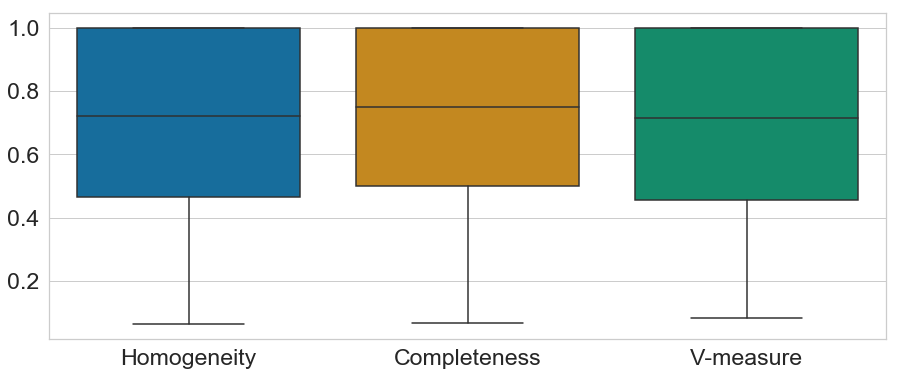

In [195]:
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid", font_scale= 2.1)
plt.figure(figsize=(15,6))
sns.boxplot(data=result_df[['Homogeneity','Completeness','V-measure']], palette="colorblind", width=0.8, fliersize=0.3)
plt.savefig('./figure3_.pdf')

# import the datasets

In [17]:
# import the dataset
file = open('./../../macse_253/gt_data_list.txt','r')
#file = open('./../../trees.txt', 'r')
#trees = [str(_).split('\n')[0] for _ in file.readlines()]
trees = [str(_).split('.csv')[0] for _ in file.readlines()]
file.close()
# Blanquart & al
data_true = pd.read_csv('./blanquart_clusters.csv', sep=';')

#tsm
### Kalign
tsm_Kalign_nucHom = pd.read_csv('./Kalign/tsm_nucHom.csv', sep=';')
tsm_Kalign_degHom = pd.read_csv('./Kalign/tsm_degHom.csv', sep=';')
tsm_Kalign_m = pd.read_csv('./Kalign/tsm_m.csv', sep=';')
### Macse
tsm_Macse_nucHom = pd.read_csv('./Macse/tsm_nucHom.csv', sep=';')
tsm_Macse_degHom = pd.read_csv('./Macse/tsm_degHom.csv', sep=';')
tsm_Macse_m = pd.read_csv('./Macse/tsm_m.csv', sep=';')

#tsm corrigé
### Kalign
tsm_corrigé_Kalign_nucHom = pd.read_csv('./Kalign/tsm_corrigé_nucHom.csv', sep=';')
tsm_corrigé_Kalign_degHom = pd.read_csv('./Kalign/tsm_corrigé_degHom.csv', sep=';')
tsm_corrigé_Kalign_m = pd.read_csv('./Kalign/tsm_corrigé_m.csv', sep=';')

### Macse
tsm_corrigé_Macse_nucHom = pd.read_csv('./Macse/tsm_corrigé_nucHom.csv', sep=';')
tsm_corrigé_Macse_degHom = pd.read_csv('./Macse/tsm_corrigé_degHom.csv', sep=';')
tsm_corrigé_Macse_m = pd.read_csv('./Macse/tsm_corrigé_m.csv', sep=';')


In [13]:
data_Kalign = [tsm_Kalign_nucHom, tsm_Kalign_degHom, tsm_Kalign_m, tsm_corrigé_Kalign_nucHom, tsm_corrigé_Kalign_degHom, tsm_corrigé_Kalign_m]
names_Kalign = ['tsm_Kalign_nucHom', 'tsm_Kalign_degHom', 'tsm_Kalign_m', 'tsm_corrigé_Kalign_nucHom', 'tsm_corrigé_Kalign_degHom', 'tsm_corrigé_Kalign_m']
true_labels = list(data_true['group'].values)

# Metrics

In [137]:
df_results_metrics_k_align = pd.DataFrame(columns=['methode', 'metric', 'value'])
for i,data in enumerate(data_Kalign):
    pred_labels = list(data['group'].values)
    scores = sk.homogeneity_completeness_v_measure(true_labels, pred_labels)
    metrics = list(scores)
    for j, metric in enumerate(metrics):
        
        if j==0:
            df_results_metrics_k_align.loc[names_Kalign[i]+str(j)] = [names_Kalign[i], 'Homogeneity', metric]
        elif j== 1:
            df_results_metrics_k_align.loc[names_Kalign[i]+str(j)] = [names_Kalign[i], 'Completeness', metric]
        elif j==2 :
            df_results_metrics_k_align.loc[names_Kalign[i]+str(j)] = [names_Kalign[i], 'V-measure', metric]
        else:
            print('ERROR !!!')
df_results_metrics_k_align


,methode,metric,value
tsm_Kalign_nucHom0,tsm_Kalign_nucHom,Homogeneity,0.908661
tsm_Kalign_nucHom1,tsm_Kalign_nucHom,Completeness,0.928568
tsm_Kalign_nucHom2,tsm_Kalign_nucHom,V-measure,0.918507
tsm_Kalign_degHom0,tsm_Kalign_degHom,Homogeneity,0.890288
tsm_Kalign_degHom1,tsm_Kalign_degHom,Completeness,0.933865
tsm_Kalign_degHom2,tsm_Kalign_degHom,V-measure,0.911556
tsm_Kalign_m0,tsm_Kalign_m,Homogeneity,0.894596
tsm_Kalign_m1,tsm_Kalign_m,Completeness,0.932288
tsm_Kalign_m2,tsm_Kalign_m,V-measure,0.913053
tsm_corrigé_Kalign_nucHom0,tsm_corrigé_Kalign_nucHom,Homogeneity,0.903962


# Plots

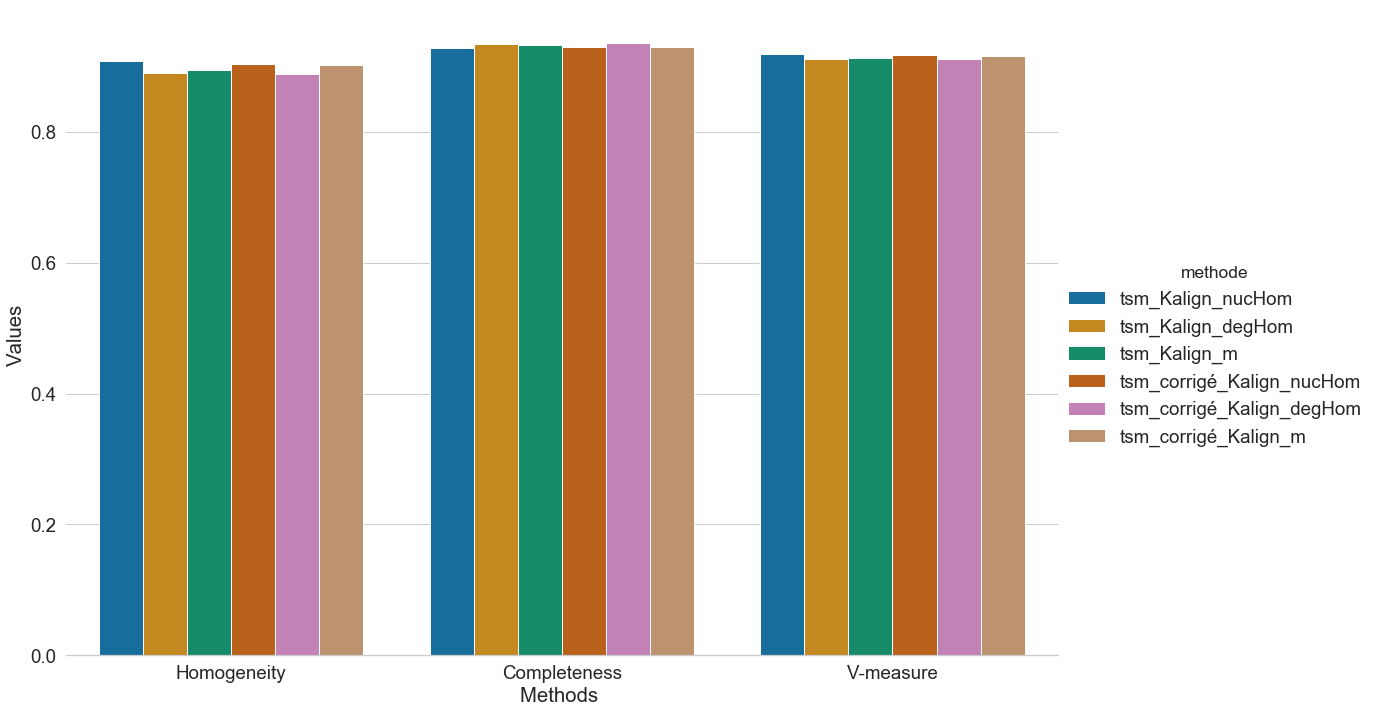

In [136]:
# by trnascripts
sns.set_theme(style="whitegrid", font_scale= 1.7)
g = sns.catplot(
    data=df_results_metrics_k_align,
    x='metric', 
    y='value', 
    hue='methode', 
    palette="colorblind",
    kind="bar",
    height=10 , aspect=1.5
    
    
)
g.despine(left=True)
g.set_axis_labels("Methods ", "Values")

In [31]:
# by gene families
scores_tsm_Kalign_nucHom = pd.read_csv('./../clustering_per_families/Kalign/tsm_nucHom', sep=';')
scores_tsm_Kalign_degHom = pd.read_csv('./../clustering_per_families/Kalign/tsm_degHom', sep=';')
scores_tsm_Kalign_m = pd.read_csv('./../clustering_per_families/Kalign/tsm_m', sep=';')
### Macse

#tsm corrigé
### Kalign
scores_tsm_corrigé_Kalign_nucHom = pd.read_csv('./../clustering_per_families/Kalign/tsm_corrigé_nucHom', sep=';')
scores_tsm_corrigé_Kalign_degHom = pd.read_csv('./../clustering_per_families/Kalign/tsm_corrigé_degHom', sep=';')
scores_tsm_corrigé_Kalign_m = pd.read_csv('./../clustering_per_families/Kalign/tsm_corrigé_m', sep=';')

#add the method column
names_Kalign = ['tsm_Kalign_nucHom', 'tsm_Kalign_degHom', 'tsm_Kalign_m', 'tsm_corrigé_Kalign_nucHom', 'tsm_corrigé_Kalign_degHom', 'tsm_corrigé_Kalign_m']
scores_tsm_Kalign_nucHom['method'] = ['tsm+Kalign+unitary' for _ in range(len(scores_tsm_Kalign_nucHom))]
scores_tsm_Kalign_degHom['method'] = ['tsm+Kalign+length' for _ in range(len(scores_tsm_Kalign_degHom))]
scores_tsm_Kalign_m['method'] = ['tsm+Kalign+mean' for _ in range(len(scores_tsm_Kalign_m))]
scores_tsm_corrigé_Kalign_nucHom['method'] = ['tsm++Kalign+unitary' for _ in range(len(scores_tsm_corrigé_Kalign_nucHom))]
scores_tsm_corrigé_Kalign_degHom['method'] = ['tsm++Kalign+length' for _ in range(len(scores_tsm_corrigé_Kalign_degHom))]
scores_tsm_corrigé_Kalign_m['method'] = ['tsm++Kalign+mean' for _ in range(len(scores_tsm_corrigé_Kalign_m))]

In [32]:
# by gene families
scores_tsm_Macse_nucHom = pd.read_csv('./../clustering_per_families/Macse/tsm_nucHom', sep=';')
scores_tsm_Macse_degHom = pd.read_csv('./../clustering_per_families/Macse/tsm_degHom', sep=';')
scores_tsm_Macse_m = pd.read_csv('./../clustering_per_families/Macse/tsm_m', sep=';')
### Macse

#tsm corrigé
### Macse
scores_tsm_corrigé_Macse_nucHom = pd.read_csv('./../clustering_per_families/Macse/tsm_corrigé_nucHom', sep=';')
scores_tsm_corrigé_Macse_degHom = pd.read_csv('./../clustering_per_families/Macse/tsm_corrigé_degHom', sep=';')
scores_tsm_corrigé_Macse_m = pd.read_csv('./../clustering_per_families/Macse/tsm_corrigé_m', sep=';')

#add the method column
names_Macse = ['tsm_Macse_nucHom', 'tsm_Macse_degHom', 'tsm_Macse_m', 'tsm_corrigé_Macse_nucHom', 'tsm_corrigé_Macse_degHom', 'tsm_corrigé_Macse_m']
scores_tsm_Macse_nucHom['method'] = ['tsm+Macse+unitary' for _ in range(len(scores_tsm_Macse_nucHom))]
scores_tsm_Macse_degHom['method'] = ['tsm+Macse+length' for _ in range(len(scores_tsm_Macse_degHom))]
scores_tsm_Macse_m['method'] = ['tsm+Macse+mean' for _ in range(len(scores_tsm_Macse_m))]
scores_tsm_corrigé_Macse_nucHom['method'] = ['tsm++Macse+unitary' for _ in range(len(scores_tsm_corrigé_Macse_nucHom))]
scores_tsm_corrigé_Macse_degHom['method'] = ['tsm++Macse+length' for _ in range(len(scores_tsm_corrigé_Macse_degHom))]
scores_tsm_corrigé_Macse_m['method'] = ['tsm++Macse+mean' for _ in range(len(scores_tsm_corrigé_Macse_m))]

In [33]:
all_scores = pd.concat([
    scores_tsm_Kalign_nucHom,
    scores_tsm_Kalign_nucHom,
    scores_tsm_Kalign_degHom,
    scores_tsm_Kalign_m,
    scores_tsm_corrigé_Kalign_nucHom,
    scores_tsm_corrigé_Kalign_degHom,
    scores_tsm_corrigé_Kalign_m,
    scores_tsm_Macse_nucHom,
    scores_tsm_Macse_nucHom,
    scores_tsm_Macse_degHom,
    scores_tsm_Macse_m,
    scores_tsm_corrigé_Macse_nucHom,
    scores_tsm_corrigé_Macse_degHom,
    scores_tsm_corrigé_Macse_m], ignore_index=True )

In [34]:
df_results_metrics_k_align_box = pd.DataFrame(columns=[
    'family', 'methode', 'metrics', 'values'
])
for i,row in all_scores.iterrows():
    homogeneity = row.Homogeneity
    completeness = row.Completeness
    v_measure = row['V-measure']
    method = row.method
    family = row.family
    df_results_metrics_k_align_box.loc['H'+family+str(i)] = [family, method, 'Homogeneity', homogeneity]
    df_results_metrics_k_align_box.loc['c'+family+str(i)] = [family, method, 'Completeness', completeness]
    df_results_metrics_k_align_box.loc['v'+family+str(i)] = [family, method, 'V-measure', v_measure]


In [35]:
df_results_metrics_k_align_box

,family,methode,metrics,values
HENSGT003900000000800,ENSGT00390000000080,tsm+Kalign+unitary,Homogeneity,0.750000
cENSGT003900000000800,ENSGT00390000000080,tsm+Kalign+unitary,Completeness,0.600000
vENSGT003900000000800,ENSGT00390000000080,tsm+Kalign+unitary,V-measure,0.642857
HENSGT003900000001041,ENSGT00390000000104,tsm+Kalign+unitary,Homogeneity,1.000000
cENSGT003900000001041,ENSGT00390000000104,tsm+Kalign+unitary,Completeness,1.000000
...,...,...,...,...
cENSGT009000001409013302,ENSGT00900000140901,tsm++Macse+mean,Completeness,1.000000
vENSGT009000001409013302,ENSGT00900000140901,tsm++Macse+mean,V-measure,1.000000
HENSGT009000001409263303,ENSGT00900000140926,tsm++Macse+mean,Homogeneity,1.000000
cENSGT009000001409263303,ENSGT00900000140926,tsm++Macse+mean,Completeness,1.000000


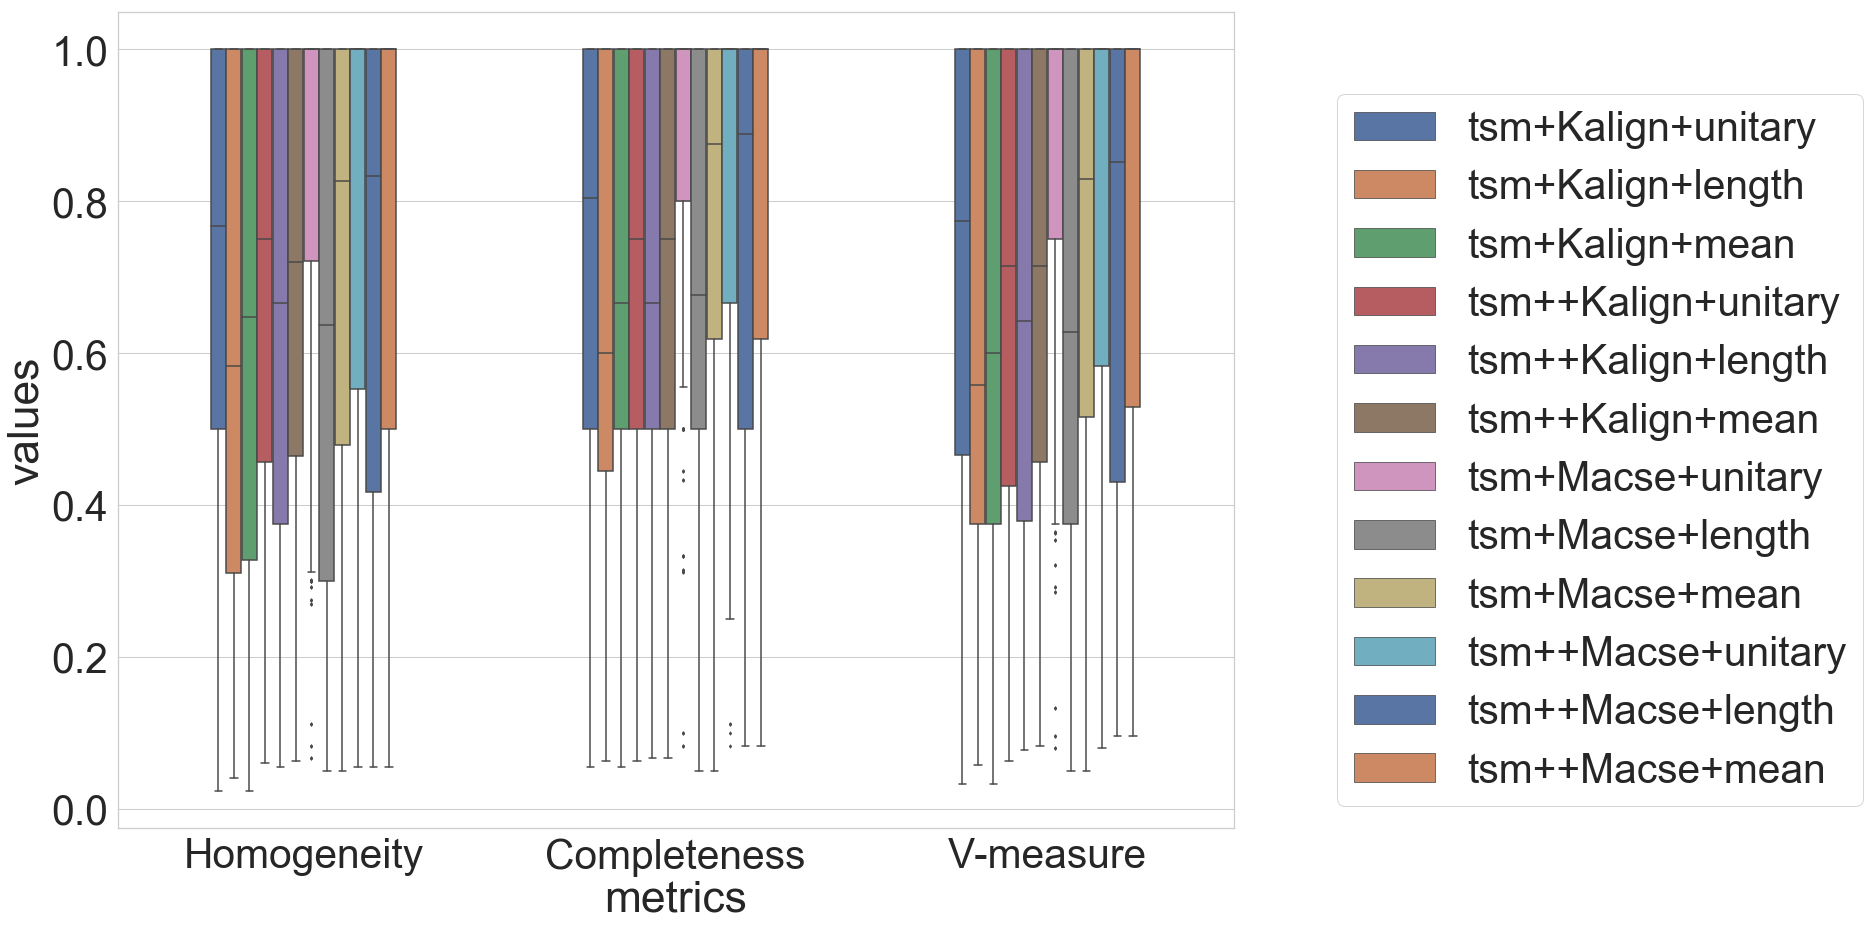

In [36]:
from matplotlib import pyplot as plt
sns.set_theme(style="whitegrid", font_scale= 3.7)
plt.figure(figsize=(20,15))
sns.boxplot(
    data=df_results_metrics_k_align_box,x='metrics', 
    y='values', 
    hue='methode',
    palette="deep", width=0.5, fliersize=2.3) 
#plt.legend(title='This is My Legend Title')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=2)
plt.savefig('./comparisons_boxplots_12.pdf')

In [37]:
x = df_results_metrics_k_align_box[df_results_metrics_k_align_box['methode']=='tsm++Macse+mean']

In [38]:
x['values']

HENSGT003900000000803068    1.0
cENSGT003900000000803068    1.0
vENSGT003900000000803068    1.0
HENSGT003900000001043069    1.0
cENSGT003900000001043069    1.0
                           ... 
cENSGT009000001409013302    1.0
vENSGT009000001409013302    1.0
HENSGT009000001409263303    1.0
cENSGT009000001409263303    1.0
vENSGT009000001409263303    1.0
Name: values, Length: 708, dtype: float64

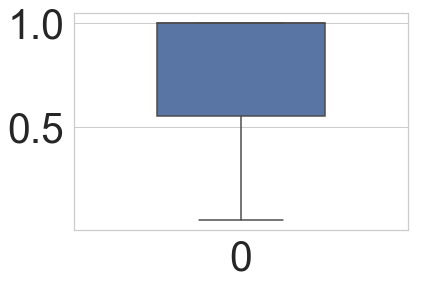

In [39]:
sns.boxplot(
    data=x['values'],
    palette="deep", width=0.5, fliersize=2.3) 

In [54]:
tmp = scores_tsm_corrigé_Macse_nucHom[(scores_tsm_corrigé_Macse_nucHom.Homogeneity==1) & (scores_tsm_corrigé_Macse_nucHom.Completeness==1) & (scores_tsm_corrigé_Macse_nucHom['V-measure']==1)]

In [55]:
tmp

,family,Homogeneity,Completeness,V-measure,method
0,ENSGT00390000000080,1.0,1.0,1.0,tsm++Macse+unitary
1,ENSGT00390000000104,1.0,1.0,1.0,tsm++Macse+unitary
5,ENSGT00390000001038,1.0,1.0,1.0,tsm++Macse+unitary
7,ENSGT00390000002049,1.0,1.0,1.0,tsm++Macse+unitary
8,ENSGT00390000002215,1.0,1.0,1.0,tsm++Macse+unitary
...,...,...,...,...,...
228,ENSGT00900000140835,1.0,1.0,1.0,tsm++Macse+unitary
231,ENSGT00900000140842,1.0,1.0,1.0,tsm++Macse+unitary
232,ENSGT00900000140850,1.0,1.0,1.0,tsm++Macse+unitary
234,ENSGT00900000140901,1.0,1.0,1.0,tsm++Macse+unitary


In [56]:
trs = tmp.family.values
len(trs)
result_df[result_df.family.isin(list(trs))].sum()

family          ENSGT00390000000080ENSGT00390000000104ENSGT003...
Homogeneity                                               138.467
Completeness                                              138.667
V-measure                                                 138.385
nb_ref                                                        424
nb_pred                                                       422
dtype: object

In [57]:
result_df

,family,Homogeneity,Completeness,V-measure,nb_ref,nb_pred
ENSGT00390000000080,ENSGT00390000000080,1.000000,1.000000,1.000000,3,3
ENSGT00390000000104,ENSGT00390000000104,1.000000,1.000000,1.000000,3,3
ENSGT00390000000212,ENSGT00390000000212,1.000000,1.000000,1.000000,7,7
ENSGT00390000000583,ENSGT00390000000583,0.111111,0.111111,0.111111,2,2
ENSGT00390000000860,ENSGT00390000000860,0.416667,0.500000,0.450000,3,3
...,...,...,...,...,...,...
ENSGT00900000140842,ENSGT00900000140842,1.000000,1.000000,1.000000,3,3
ENSGT00900000140850,ENSGT00900000140850,1.000000,1.000000,1.000000,2,2
ENSGT00900000140881,ENSGT00900000140881,0.687500,0.750000,0.714286,4,3
ENSGT00900000140901,ENSGT00900000140901,1.000000,1.000000,1.000000,2,2
